# SEL0634 - Laboratório de Robôs Manipuladores

## Inicialização da biblioteca 

In [3]:
!pip install spatialmath-python
!pip install sympy

In [12]:
import numpy as np
from spatialmath import *
from math import pi

import matplotlib.pyplot as plt
# no Binder utilizar essa linha
# %matplotlib notebook  
# no Colab utilizar essa linha
%matplotlib inline


## Tarefa 1 - Sequencia de Rotações Aplicadas em um Cubo

### Desenhar cubo na posição inicial

Considere a seguinte função para desenhar os vértices de um cubo:

In [13]:
def plot_cubo_grafico(cubo,grafico):
  grafico.scatter(xs=cubo[0], ys=cubo[1], zs=cubo[2], s=20)  # draw vertices
  # draw lines joining the vertices
  lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
  #lines = [[0,1,5,6]]
  for line in lines:
      grafico.plot([cubo[0,i] for i in line], [cubo[1,i] for i in line], [cubo[2,i] for i in line])
    # List comprehension, https://stackoverflow.com/questions/11479392/what-does-a-for-loop-within-a-list-do-in-python
    
def plot_cubo(cubo):
  fig = plt.figure()
  SE3().plot(frame='0', dims=[-2,3,-2,3,0,5], color='black') # Plot system of coordinates
  grafico = plt.gca()
  plot_cubo_grafico(cubo,grafico)

Considere que na posição inicial, o cubo possui vértices $^0P_i$ posicionados  em relação ao sistema inercial $\{0\}$ nas seguintes coordenadas:

In [17]:
P = np.array([[0, 2, 2, 0, 0, 2, 2, 0], [0, 0, 2, 2, 0, 0, 2, 2], [0, 0, 0, 0, 2, 2, 2, 2]])
print("cubo = ", P)
print("cubo[0] = ", P[0])
print("cubo[1] = ", P[1])
print("cubo[2] = ", P[2])

lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
#lines = [[5,6], [6,7], [7,4], [4,5]]
line = lines[1]
print(lines[0][1])
print("cubo[0,i],cubo[1,i],cubo[2,i] = ", [P[0,i] for i in line], [P[1,i] for i in line], [P[2,i] for i in line])
# https://stackoverflow.com/questions/16505000/numpy-difference-between-aij-and-ai-j

cubo =  [[0 2 2 0 0 2 2 0]
 [0 0 2 2 0 0 2 2]
 [0 0 0 0 2 2 2 2]]
cubo[0] =  [0 2 2 0 0 2 2 0]
cubo[1] =  [0 0 2 2 0 0 2 2]
cubo[2] =  [0 0 0 0 2 2 2 2]
1
cubo[0,i],cubo[1,i],cubo[2,i] =  [2, 2, 2, 0] [0, 2, 2, 2] [0, 0, 2, 2]


Para plotar o cubo:

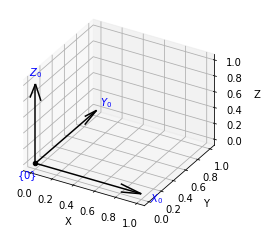

<Figure size 432x288 with 0 Axes>

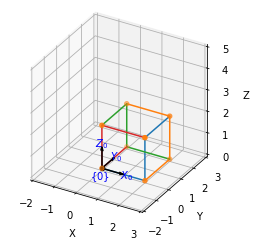

In [18]:
SE3().plot(frame='0', color='black') # Plot system of coordinates
plot_cubo(P)

### Primeira transformação

Aplique uma rotação no cubo em torno do eixo $x$ de um ângulo de $90^o$ e mostre os vertices do cubo nesta nova pose. Nesta seção não serão considerados movimentos de translação; portanto pode-se utilizar matrizes SO3 (Special Ortogonal n = 3). Alternativamente, matrizes SE3 (Special Euclidean n = 3) podem ser adotadas, mantendo o quadrante de translação sempre nulo.

Considere que um sistema de coordenadas fixo no cubo após esta rotação está com orientação dada por $\{1\}$, ou seja, após essa primeira rotação, a matriz $^0R_1$ representa a orientação do sistema de coordenadas fixo no cubo em relação ao sistema inercial. 

In [2]:
#########################
# Coloque seu código aqui
# Por simplicidade, vamos usar matrizes SO3. Utilizaremos SE3 mais adiante neste mesmo arquivo.
#H1 = SE3(0,0,0)*SE3.Rx(90,'deg')
T01 = S3(0,0,0) # Translação
R01 = S3.Rx(90,'deg') # Rotação
H01 = T01*R01 # Matriz de transformação homogênea completa

# H01 = R01, não há translação
P01 = R01*P

R01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R01
#########################
plot_cubo(P01)
R01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R01

NameError: name 'S3' is not defined

### Segunda transformação

Aplique uma nova rotação no cubo em torno do eixo $z$ do sistema atual $\{1\}$ de um ângulo de $90^0$, e mostre os vértices do cubo nesta nova pose. 

Considere que o sistema de coordenadas fixo no cubo após esta operação está com orientação dada por $\{2\}$, ou seja, a matriz $^0R_2$ representa a orientação do cubo em relação ao sistema inercial.



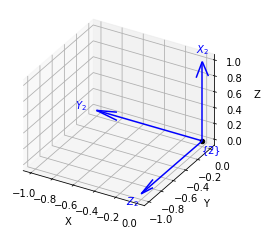

<Figure size 432x288 with 0 Axes>

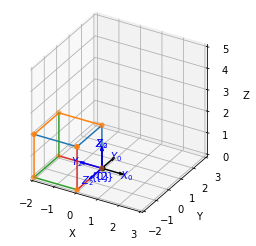

In [16]:
#########################
# Coloque seu código aqui
R12 = SE3.Rz(90,'deg')
R12

R02 = R01*R12 # Sistema atual: pós-multiplicação
P02 = R02*P

R02.plot(frame='2') # mostra o sistema de coordenadas com orientação dada por R02
########################
plot_cubo(P02)
R02.plot(frame='2') # mostra o sistema de coordenadas com orientação dada por R02

### Terceira transformação

Aplique uma nova rotação no cubo em torno do eixo $y$ do sistema inercial $\{0\}$ de um ângulo de $90^0$, e mostre os vértices do cubo nesta nova pose. 

Considere que o sistema de coordenadas fixo no cubo após esta operação está com orientação dada por $\{3\}$, ou seja, a matriz $^0R_3$ representa a orientação do cubo em relação ao sistema inercial.




In [ ]:
#########################
# Coloque seu código aqui
R3 = SE3.Ry(90,'deg')
R03 = R3*R02 # Rotação no sistema inercial {0}: pré-multiplicação
P03 = R03*P

#########################
SE3().plot(frame='0', color='black') # Plot system of coordinates
R03.plot(frame='3') # sistema de coordenadas com orientação dada por R03
#plot_cubo(P02)
plot_cubo(P03)
#R03.plot(frame='3') # mostra o sistema de coordenadas com orientação dada por R03

### Matrizes de rotação

Quais são as matrizes de rotação: 

$^0R_1 =$

In [9]:
# Mostre a matriz de rotação aqui
#R01 = SE3.Rx(90,'deg') # Special Euclidean, 4x4 homogeneous transf. matrix
R01 = SO3.Rx(90,'deg') # Special Ortogonal, 3x3 rotation matrix
print(R01)

   1         0         0         
   0         0        -1         
   0         1         0         



$^0R_2 = $

In [10]:
# Mostre a matriz de rotações aqui
#R02 = R01*SE3.Rz(90,'deg')
R02 = R01*SO3.Rz(90,'deg')
print(R02)

   0        -1         0         
   0         0        -1         
   1         0         0         



$^0R_3 = $

In [11]:
# Mostre a matriz de rotações aqui
#R03 = SE3.Ry(90,'deg')*R02
R03 = SO3.Ry(90,'deg')*R02
print(R03)

   1         0         0         
   0         0        -1         
   0         1         0         



# **Testes com Rotação e Translação: SE(3)**

Nesta seção as transformações anteriores serão repetidas com a adição de um termo translacional. Para realizar movimentos de translação e rotação, é necessário utilizar matrizes de transformação homogênea do espaço Special Euclidean n = 3. Estas matrizes possuem dimensão 4x4 e podem ser subdivididas em quatro quadrantes, como mostrado abaixo.

<h1><center>
$
^0H_1 = \begin{bmatrix}
^0R_1 \quad ^0d_1 \\
0 \quad \ \ \ 1
\end{bmatrix}
$
</center></h1>

Onde $^0R_1$ é a matriz de rotação, $^0d_1 = \begin{bmatrix} ^0x_1 \\ ^0y_1 \\ ^0z_1 \end{bmatrix}$ é a matriz de rotação, 0 = \[0 0 0\] e 1 = \[1\]. 
### Primeira transformação
## Primeira transformação
# Primeira transformação
texto

#########################
# Coloque seu código aqui

#H1 = SE3(0,0,0)*SE3.Rx(90,'deg')
T01 = SE3(0,0,0) # Translação
R01 = SE3.Rx(90,'deg') # Rotação
H01 = T01*R01 # Matriz de transformação homogênea completa

# H01 = R01, não há translação
P01 = R01*P

R01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R01
#########################
plot_cubo(P01)
R01.plot(frame='1') # mostra o sistema de coordenadas com orientação dada por R01

Segunda transformação

In [ ]:
#########################
# Coloque seu código aqui
R12 = SE3.Rz(90,'deg')
R12

R02 = R01*R12 # Sistema atual: pós-multiplicação
P02 = R02*P

R02.plot(frame='2') # mostra o sistema de coordenadas com orientação dada por R02
########################
plot_cubo(P02)
R02.plot(frame='2') # mostra o sistema de coordenadas com orientação dada por R02

Terceira transformação

In [ ]:
#########################
# Coloque seu código aqui
R3 = SE3.Ry(90,'deg')
R03 = R3*R02 # Rotação no sistema inercial {0}: pré-multiplicação
P03 = R03*P

#########################
SE3().plot(frame='0', color='black') # Plot system of coordinates
R03.plot(frame='3') # sistema de coordenadas com orientação dada por R03
plot_cubo(P02)
plot_cubo(P03)
#R03.plot(frame='3') # mostra o sistema de coordenadas com orientação dada por R03